<a href="https://colab.research.google.com/github/raidhruv/tumour_model_on_mri_dataset/blob/main/alzehimer_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Your zip file path inside the collabed folder
zip_path = '/content/drive/MyDrive/collabed/alzheimer_dataset.zip'

# Extract the contents into /content/alzheimer_dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/alzheimer_dataset')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the extracted train/test folders
train_path = '/content/alzheimer_dataset/combined/train'
val_path   = '/content/alzheimer_dataset/combined/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create data generators
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # 🧠 Because we have 4 classes!
)

val_gen = datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 10240 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')  # 👈 4 output neurons for 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # 👈 for multi-class classification
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import zipfile
zip_path = '/content/drive/MyDrive/collabed/alzheimer_dataset.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/alzheimer_dataset')


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/alzheimer_dataset/combined/train'
val_path   = '/content/alzheimer_dataset/combined/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 10240 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [7]:
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.5630 - loss: 1.2916 - val_accuracy: 0.7412 - val_loss: 0.6452
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8400 - loss: 0.3638 - val_accuracy: 0.8280 - val_loss: 0.4214
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8915 - loss: 0.2546 - val_accuracy: 0.8812 - val_loss: 0.2750
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9305 - loss: 0.1692 - val_accuracy: 0.9179 - val_loss: 0.1910
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9446 - loss: 0.1318 - val_accuracy: 0.9500 - val_loss: 0.1287
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9629 - loss: 0.0933 - val_accuracy: 0.9375 - val_loss: 0.1567
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9628 - loss: 0.0869 - val_accuracy: 0.9633 - val_loss: 0.0826
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9698 - loss: 0.0740 - val_accurac

In [8]:
model.save('/content/drive/MyDrive/collabed/alzheimer_model.h5')


In [9]:
from google.colab import files
uploaded = files.upload()


Saving 1 (9).jpg to 1 (9).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
Prediction: No Impairment (96.16% confidence)


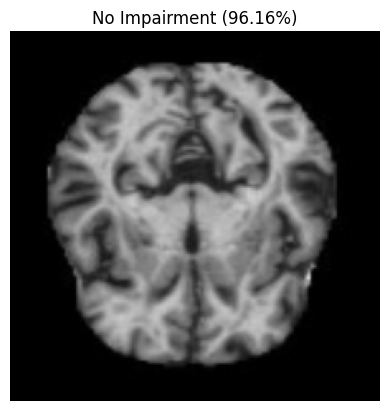

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
img_array = img / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)[0]

# Class labels (ordered same as training folders)
class_labels = list(train_gen.class_indices.keys())
predicted_class = class_labels[np.argmax(pred)]
confidence = round(float(np.max(pred)) * 100, 2)

# Display result
print(f"Prediction: {predicted_class} ({confidence}% confidence)")

# Show the image
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence}%)")
plt.axis('off')
plt.show()


In [14]:
from google.colab import files
uploaded = files.upload()


Saving 17 (2).jpg to 17 (2).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: Moderate Impairment (100.0% confidence)


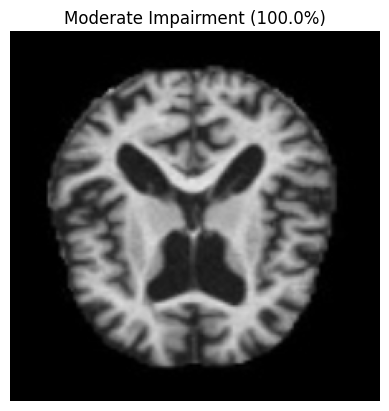

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
img_array = img / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)[0]

# Class labels (ordered same as training folders)
class_labels = list(train_gen.class_indices.keys())
predicted_class = class_labels[np.argmax(pred)]
confidence = round(float(np.max(pred)) * 100, 2)

# Display result
print(f"Prediction: {predicted_class} ({confidence}% confidence)")

# Show the image
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence}%)")
plt.axis('off')
plt.show()


In [16]:
from google.colab import files
uploaded = files.upload()


Saving 1 (13).jpg to 1 (13).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Very Mild Impairment (99.31% confidence)


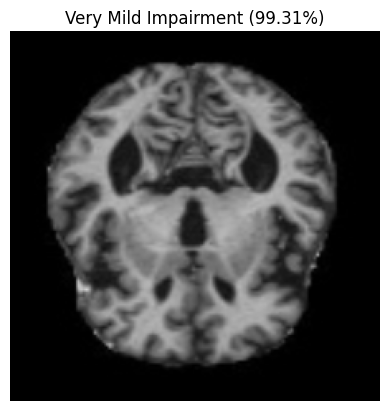

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
img_array = img / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)[0]

# Class labels (ordered same as training folders)
class_labels = list(train_gen.class_indices.keys())
predicted_class = class_labels[np.argmax(pred)]
confidence = round(float(np.max(pred)) * 100, 2)

# Display result
print(f"Prediction: {predicted_class} ({confidence}% confidence)")

# Show the image
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence}%)")
plt.axis('off')
plt.show()


In [18]:
from google.colab import files
uploaded = files.upload()


Saving 4 (9).jpg to 4 (9).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: Mild Impairment (100.0% confidence)


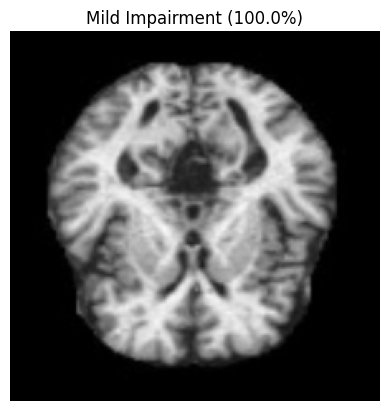

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
img_array = img / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)[0]

# Class labels (ordered same as training folders)
class_labels = list(train_gen.class_indices.keys())
predicted_class = class_labels[np.argmax(pred)]
confidence = round(float(np.max(pred)) * 100, 2)

# Display result
print(f"Prediction: {predicted_class} ({confidence}% confidence)")

# Show the image
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence}%)")
plt.axis('off')
plt.show()
